In [1]:
import os
import torch
from torchvision.models import resnet50
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import pickle
torch.set_printoptions(sci_mode=False)

In [2]:
ckp_path = os.path.join('/home/cvds_lab/mxt-sim/stats/pretrained')
os.listdir(ckp_path)

['stats_W4ANone.pkl',
 'stats_W8ANone.pkl',
 'stats_W5ANone.pkl',
 'stats_W6ANone.pkl',
 'stats_W16ANone.pkl']

In [3]:
pkl_16 = pickle.load(open(os.path.join(ckp_path, 'stats_W16ANone.pkl'), 'rb'))
pkl_8 = pickle.load(open(os.path.join(ckp_path, 'stats_W8ANone.pkl'), 'rb'))
pkl_6 = pickle.load(open(os.path.join(ckp_path, 'stats_W6ANone.pkl'), 'rb'))
pkl_5 = pickle.load(open(os.path.join(ckp_path, 'stats_W5ANone.pkl'), 'rb'))
pkl_4 = pickle.load(open(os.path.join(ckp_path, 'stats_W4ANone.pkl'), 'rb'))
pkl_16.keys()

dict_keys(['m5', 'kurtosis', 'var', 'm6', 'm7', 'cv', 'm8', 'mean', 'skewness'])

In [4]:
ckp_path_kurt = os.path.join('/home/cvds_lab/mxt-sim/stats/kurt')
os.listdir(ckp_path_kurt)

['stats_W4ANone.pkl',
 'stats_W8ANone.pkl',
 'stats_W5ANone.pkl',
 'stats_W6ANone.pkl',
 'stats_W16ANone.pkl']

In [5]:
pkl_16_kurt = pickle.load(open(os.path.join(ckp_path_kurt, 'stats_W16ANone.pkl'), 'rb'))
pkl_8_kurt = pickle.load(open(os.path.join(ckp_path_kurt, 'stats_W8ANone.pkl'), 'rb'))
pkl_6_kurt = pickle.load(open(os.path.join(ckp_path_kurt, 'stats_W6ANone.pkl'), 'rb'))
pkl_5_kurt = pickle.load(open(os.path.join(ckp_path_kurt, 'stats_W5ANone.pkl'), 'rb'))
pkl_4_kurt = pickle.load(open(os.path.join(ckp_path_kurt, 'stats_W4ANone.pkl'), 'rb'))
pkl_16_kurt.keys()

dict_keys(['m5', 'kurtosis', 'm8', 'var', 'm6', 'm7', 'cv', 'skewness', 'mean'])

In [6]:
stats = ['mean', 'var', 'skewness', 'kurtosis']
# stats = ['m5', 'm6', 'm7', 'm8']

def list_mean(l):
    if len(l) == 0:
        return None

    res = l[0].clone()
    for t in l[1:]:
        res += t
    return res / len(l)

def rel_change(p1, p2, stat_name, stat_id):
    t1 = list_mean(p1[stat_name][stat_id])
    t2 = list_mean(p2[stat_name][stat_id])
    p = 1
    return torch.abs(torch.norm(t1, p=p) - torch.norm(t2, p=p)) / torch.norm(t1, p=p)

def rel_change_df(p1, p2):
    df = pd.DataFrame(index=["L{}".format(l) for l in range(len(p1[stats[0]]))], columns=stats)
    for s in stats:
        arr = []
        for id_ in p1[s]:
            arr.append(rel_change(p1, p2, s, id_).item())
        df[s] = arr
    return df

def rel_change_plot(df):
    font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
    matplotlib.rc('font', **font)

    ind = np.arange(len(df))    # the x locations for the groups
    width = 0.15

    plt.bar(ind, df['mean'], width)
    plt.bar(ind + width, df['var'], width)
    plt.bar(ind + 2*width, df['skewness'], width)
    plt.bar(ind + 3*width, df['kurtosis'], width)

    plt.ylabel('moments change %', fontsize=25)
    plt.xticks(ind, df.index);
    plt.legend(df.columns, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

Text(0.5,1,'Pretrained original')

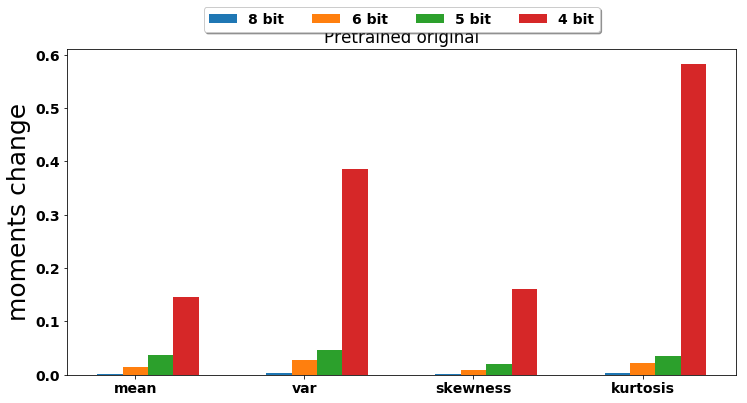

In [19]:
df8 = rel_change_df(pkl_16, pkl_8)
df6 = rel_change_df(pkl_16, pkl_6)
df5 = rel_change_df(pkl_16, pkl_5)
df4 = rel_change_df(pkl_16, pkl_4)

change8 = [df8[s].mean() for s in stats]
change6 = [df6[s].mean() for s in stats]
change5 = [df5[s].mean() for s in stats]
change4 = [df4[s].mean() for s in stats]
change_post_df = pd.DataFrame(data=np.array([change8, change6, change5, change4]), columns=stats, index=[8, 6, 5, 4])

ind = np.arange(len(change8))
width = 0.15

rcParams['figure.figsize'] = 12, 6
plt.bar(ind, change8, width)
plt.bar(ind + width, change6, width)
plt.bar(ind + 2*width, change5, width)
plt.bar(ind + 3*width, change4, width)

plt.ylabel('moments change', fontsize=25)
plt.xticks(ind+width, stats);
plt.legend(['8 bit', '6 bit', '5 bit', '4 bit'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

plt.title("Pretrained original")

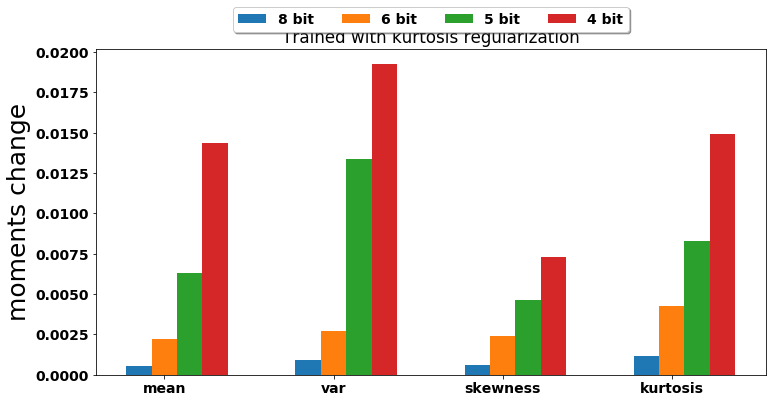

In [20]:
df8 = rel_change_df(pkl_16_kurt, pkl_8_kurt)
df6 = rel_change_df(pkl_16_kurt, pkl_6_kurt)
df5 = rel_change_df(pkl_16_kurt, pkl_5_kurt)
df4 = rel_change_df(pkl_16_kurt, pkl_4_kurt)

change8 = [df8[s].mean() for s in stats]
change6 = [df6[s].mean() for s in stats]
change5 = [df5[s].mean() for s in stats]
change4 = [df4[s].mean() for s in stats]
change_kurt_df = pd.DataFrame(data=np.array([change8, change6, change5, change4]), columns=stats, index=[8, 6, 5, 4])

ind = np.arange(len(change8))
width = 0.15

rcParams['figure.figsize'] = 12, 6
plt.bar(ind, change8, width)
plt.bar(ind + width, change6, width)
plt.bar(ind + 2*width, change5, width)
plt.bar(ind + 3*width, change4, width)

plt.title("Trained with kurtosis regularization")
plt.ylabel('moments change', fontsize=25)
plt.xticks(ind+width, stats);
plt.legend(['8 bit', '6 bit', '5 bit', '4 bit'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

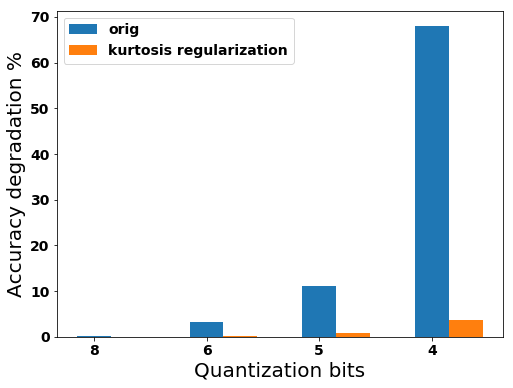

In [23]:
bits = np.array([16, 8, 6, 5, 4])
acc_post = np.array([69.76, 69.59, 66.62, 58.59, 1.8])
acc_kurtosis = np.array([69.79, 69.78, 69.64, 68.96, 66.04])

degradation_post = acc_post[0] - acc_post[1:]
degradation_kurtosis = acc_kurtosis[0] - acc_kurtosis[1:]

ind = np.arange(len(bits) - 1)
width = 0.3

rcParams['figure.figsize'] = 8, 6

plt.bar(ind, degradation_post, width)
plt.bar(ind + width, degradation_kurtosis, width)

plt.ylabel('Accuracy degradation %', fontsize=20)
plt.xlabel('Quantization bits', fontsize=20)
plt.xticks(ind, bits[1:]);
plt.legend(['orig', 'kurtosis regularization'])

Text(0.5,0,'Average change of moments due to quantization')

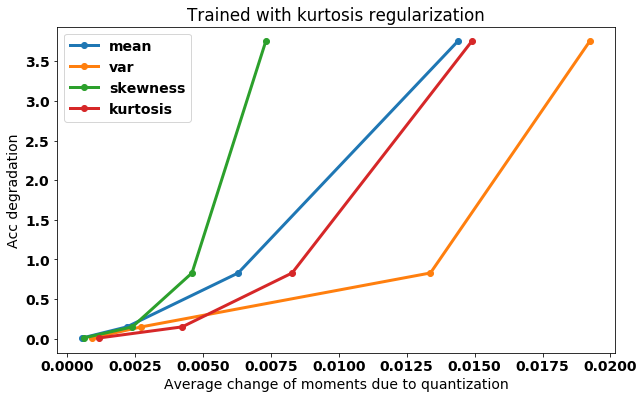

In [32]:
font = {'size': 14, 'weight': 'bold'}
matplotlib.rc('font', **font)
rcParams['figure.figsize'] = 10, 6

fig, ax = plt.subplots()
plt.plot(change_kurt_df['mean'], degradation_kurtosis, marker='o', linewidth=3)
plt.plot(change_kurt_df['var'], degradation_kurtosis, marker='o', linewidth=3)
plt.plot(change_kurt_df['skewness'], degradation_kurtosis, marker='o', linewidth=3)
plt.plot(change_kurt_df['kurtosis'], degradation_kurtosis, marker='o', linewidth=3)
plt.legend(stats)

plt.title("Trained with kurtosis regularization")
plt.ylabel("Acc degradation")
plt.xlabel("Average change of moments due to quantization")

Text(0.5,0,'Average change of moments due to quantization')

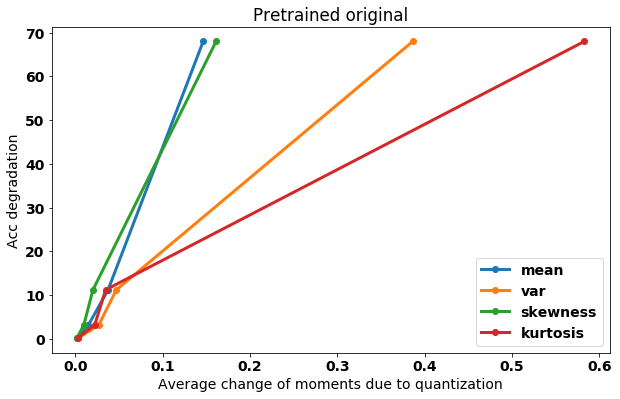

In [33]:
fig, ax = plt.subplots()
plt.plot(change_post_df['mean'], degradation_post, marker='o', linewidth=3)
plt.plot(change_post_df['var'], degradation_post, marker='o', linewidth=3)
plt.plot(change_post_df['skewness'], degradation_post, marker='o', linewidth=3)
plt.plot(change_post_df['kurtosis'], degradation_post, marker='o', linewidth=3)
plt.legend(stats)


plt.title("Pretrained original")
plt.ylabel("Acc degradation")
plt.xlabel("Average change of moments due to quantization")